In [1]:
# SYMPY code for ee-Z-WW (s-channel) amplitude and total cross-section

In [2]:
#!python -m pip install sympy

In [3]:
## Custom libraries
import sys
sys.path.append('../../app')
import packages.heppack as hep
from modules.functions import  unify_symbols, find_symbol



# Everything from sympy
from sympy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Reading heppackv0.py (March 2023)

Done


-> Modifications by me, for the original, see his notebooks. https://profchristophberger.com/lehrbuch-elementarteilchenphysik/python/

---
---
---

## Process: $ H(q) \to W^-_0(k_1)+W^+_0(k_2)$

### Symbols, vectors and constants


In [4]:
## latex symbols doesn't need "$" 
theta, phi = symbols('theta phi', real=True, positive=True)

s, t, u, p, s0, t0, u0, Gamma = symbols('s t u p s_0 t_0 u_0 Gamma', real=True, positive=True)

Mmed, mf= symbols(r'M_{med} m_f', real=True, positive=True)

## Extra terms

Etot, E1, E2, m1, m2 = symbols(r'E_tot E_1 E_2 m_1 m_2', real=True, positive=True)

# Electroweak constants
#cv, ca, gz, gw, thetaw, gz_theta, gw_theta = symbols(r'c_v c_a g_Z g_W theta_W g_Z_theta g_W_theta', real=True, positive=True )


#E1, E2, E3, E4, theta2, theta3, Mi, Mf, gx = symbols(r'E_1  E_2 E_3 E_4 theta_2 theta_3 M_i M_f g_{\chi}', real=True, positive=True)


---
# Decay width Z -> WW

In [5]:
## Por conservação de momento de uma partícula decaindo em repouso, teremos que:
# k = (M, 0, 0, 0)
# M = E1 + E2
# E2 = M - E1

k = Matrix([0, Mmed, 0, 0])

p3 = Matrix([sqrt(s)/2, mf,  theta,  0])
p4 = Matrix([sqrt(s)/2, mf, -theta,  pi])


In [6]:
# def smart_conjugate(expr):
#     T1 = expr.subs((I), (-I))
#     T2 = expr.subs((-I), (I))

#     return (T1 + T2) / 2

# def replace_sqrt_with_real_symbols(expr):
#     # Create a copy of the expression
#     new_expr = expr

#     # Traverse the expression tree in preorder
#     for i, sub_expr in enumerate(preorder_traversal(expr)):
#         # Check if the sub-expression is a square root
#         if isinstance(sub_expr, Pow) and sub_expr.exp == S.Half:
#             # Create a new symbol with real=True
#             inside_sub_expr =  list(preorder_traversal(sub_expr))[1]
            
#             real_symbol = Symbol(f'e{i}', real=True)

#             # Replace the square root with the new symbol
#             new_expr = new_expr.subs(sub_expr, real_symbol)

#     return new_expr


# def reverse(expr, expr_to_reverse):
#     # Create a copy of the expression
#     new_expr = expr

#     # Traverse the expression tree in preorder
#     for i, sub_expr in enumerate(preorder_traversal(expr)):
#         # Check if the sub-expression is a square root
#         if isinstance(sub_expr, Pow) and sub_expr.exp == S.Half:
#             # Create a new symbol with real=True
#             inside_sub_expr =  list(preorder_traversal(sub_expr))[1]
#             print(inside_sub_expr)
            
#             real_symbol = Symbol(f'e{i}', real=True)

#             # Replace the square root with the new symbol
#             expr_to_reverse = expr_to_reverse.subs(real_symbol, sub_expr)

#     return expr_to_reverse

def get_amp_squared_Gamma(prop, u3, p3, u4, p4):
    Tems_func = hep.decaimento_Gamma(prop, u3, p3, u4, p4) 

    beta, xi, lamb = symbols(r'beta xi lambda', real=True, positive=True)
    

    sum_terms = 0
    for T in Tems_func:
        T = T.subs(sqrt(- sqrt(s) + 2*mf), beta)
        T = T.subs(sqrt(s - 4*mf**2), lamb)
        sum_terms += T  * conjugate(T)
        #sum_terms = reverse(T, sum_terms)

    # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    squared_result = sum_terms #/ 4 # Averaging over the incoming helicities

    
    # Reverse substitutions
    squared_result = squared_result.subs(beta, sqrt(- sqrt(s) + 2*mf))
    squared_result = squared_result.subs(lamb, sqrt(s - 4*mf**2))

    squared_result = nsimplify(expand(squared_result))
    # last simplification
    #amp_squared = simplify(squared_result)
    #amp_squared = collect(collect(amp_squared, s), mf)

    return simplify(squared_result)

In [7]:
def Gamma_decay(amp_squared):
    # O prefator cinemático para gama é 
    prefact_decay = (1/(16*pi*Mmed))*sqrt(1 - (mf + mf)**2/Mmed**2)*sqrt(1 - (mf - mf)**2/Mmed**2)
    # Portanto, teremos que 

    Gamma_expr = prefact_decay  * amp_squared #/4#/ (12) # averagin over the initial states

    return Gamma_expr

In [8]:
MW, v, MH, MZ, lamb, GF, gw, e, thetaw= symbols(r'M_W \nu M_H M_Z \lambda G_F g_W e theta_W', real=True, positive=True)

---

# Results

In [9]:
GM = {}

## Scalar DM

In [10]:
amp_sqr = get_amp_squared_Gamma('scalar', 'phibar', p3, 'phi', p4) 
amp_sqr

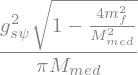

In [11]:
## Replace s = M²
GM['scalar'] = Gamma_decay(amp_sqr).subs(theta, pi).subs(s, Mmed**2)
GM['scalar']

## Fermion DM

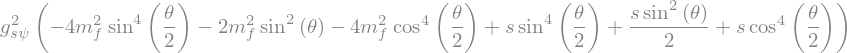

In [12]:
amp_sqr = get_amp_squared_Gamma('scalar', 'ubar', p3, 'v', p4) 
amp_sqr


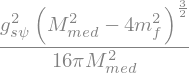

In [13]:

GM['fermion'] = simplify(Gamma_decay(amp_sqr).subs(theta, pi).subs(s, Mmed**2))
GM['fermion']

## Vector DM

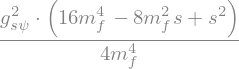

In [14]:
amp_sqr = get_amp_squared_Gamma('scalar', 'polbar', -p3, 'pol', -p4) 
amp_sqr

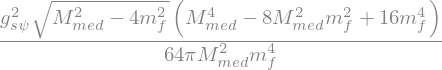

In [15]:

GM['vector'] = simplify(Gamma_decay(amp_sqr).subs(theta, pi).subs(s, Mmed**2))
GM['vector']

In [ ]:
## que é a mesma expressão que tinhamos pro decaimento do fermion e também de outros processos, o que significa que a lógica do código esta correta. Basta avaliar mais cuidadosamente a cinemática definida nos vetores iniciais 

# TODO: Automatizar a criação das expressões
# TODO: Usar as expressões automáticas para a criação de novos plots

# TODO: Validar os cálculos da materia escura fermionica e escalar com o mediador vetorial com esse novo processo.
# TODO: Criar uma ferramenta no streamlit [opcional]
# TODO: Publicar!

In [20]:
# Obtendo o código fonte da função
codigo_fonte = {}


#codigo_fonte['SM'] = sigma_SM_func
codigo_fonte['DM'] = Gamma_func
#codigo_fonte['DM_noqq'] = sigma_DM_noqq_func

import inspect
for name, func in codigo_fonte.items():

    print(inspect.getsource(func))

def _lambdifygenerated(s, M_med, m_f, Dummy_22):
    return (1/192)*Dummy_22**2*(M_med**2 - 4*m_f**2)**(3/2)/(pi*m_f**2)



In [121]:
#Gamma_vec = nsimplify(expand(Gamma_vec))

## Some functions to give a pretier expression
Gamma_vec =  together((nsimplify(expand(Gamma_vec))))

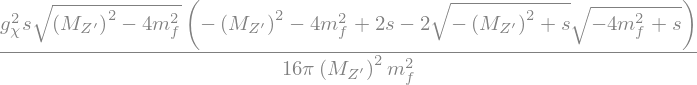

In [128]:
together(collect(expand(Gamma_vec), s )).subs(xi, sqrt(MZp **2 - 4))

###  